In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# dog and caat image dataset
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
 81% 52.0M/64.4M [00:00<00:00, 191MB/s]
100% 64.4M/64.4M [00:00<00:00, 184MB/s]


In [4]:
import zipfile
with zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip','r') as file:
  file.extractall('dog_cat_dataset')
  file.close()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
test = '/content/dog_cat_dataset/test'
train = '/content/dog_cat_dataset/train'

In [7]:
data_gen = ImageDataGenerator(rescale=1.0/255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2)

In [8]:
train_data = data_gen.flow_from_directory(train,
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode = 'categorical',
                                          )

Found 557 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
valid_data = data_gen.flow_from_directory(test,
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 140 images belonging to 2 classes.


In [11]:
valid_data.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten,MaxPooling2D,Flatten, Dropout,BatchNormalization

In [17]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(2,activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,018 (18.43 MB)

 Trainable params: 4,829,314 (18.42 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping()

In [19]:
model.fit(train_data, validation_data = (valid_data),epochs = 25)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 704ms/step - accuracy: 0.5441 - loss: 1.6811 - val_accuracy: 0.4857 - val_loss: 0.7619
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: 0.6172 - loss: 1.0389 - val_accuracy: 0.5500 - val_loss: 0.7982
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step - accuracy: 0.6737 - loss: 0.7514 - val_accuracy: 0.5143 - val_loss: 0.9783
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.7044 - loss: 0.7241 - val_accuracy: 0.5000 - val_loss: 1.1402
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 406ms/step - accuracy: 0.7343 - loss: 0.6166 - val_accuracy: 0.5000 - val_loss: 0.9560
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.8229 - loss: 0.4317 - val_accuracy: 0.5000 - val_loss: 0.9816
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 401ms/step - accuracy: 0.8342 - loss: 0.3884 - val_accuracy: 0.5143 - val_loss: 0.7487
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - accuracy: 0.8268 - loss: 0.4332 - val_accuracy: 

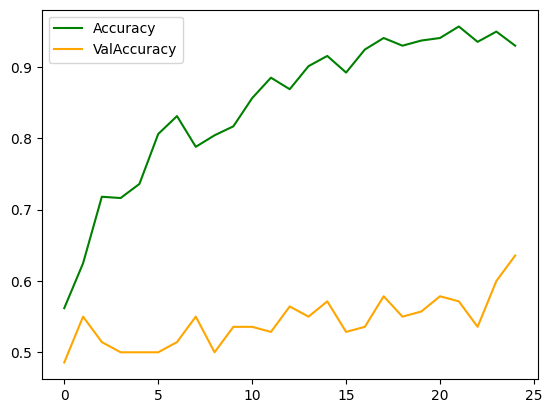

In [20]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'],label = "Accuracy",color = 'green')
plt.plot(model.history.history['val_accuracy'],label = "ValAccuracy",color = 'orange')
plt.legend()
plt.show()

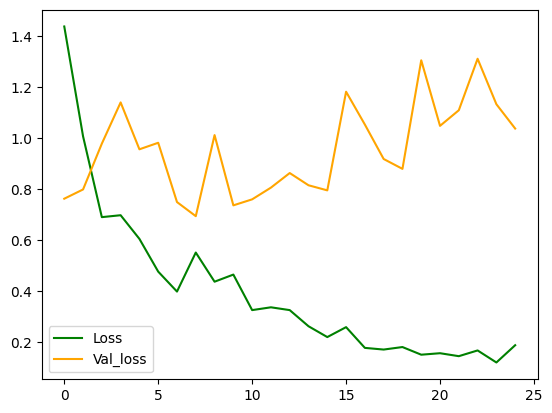

In [21]:
plt.plot(model.history.history['loss'],label = "Loss",color = 'green')
plt.plot(model.history.history['val_loss'],label = "Val_loss",color = 'orange')
plt.legend()
plt.show()

In [22]:
model.save("CatDogModel.h5")

In [23]:
from tensorflow.keras.models import load_model
mod = load_model('CatDogModel.h5')

In [24]:
# Image Prediction

from tensorflow.keras.preprocessing import image
import numpy as np

In [41]:
# load and preprocess the image
class_label = ["Cat","Dog"]
img_path = '/content/d3.jpeg'
img = image.load_img(img_path,target_size = (150,150))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis = 0)
img_arr/=255.0

In [42]:
# Make prediction
predictions = mod.predict(img_arr)
predicted_class = np.argmax(predictions)  # Get class index
predicted_label = class_label[predicted_class]  # Get class name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


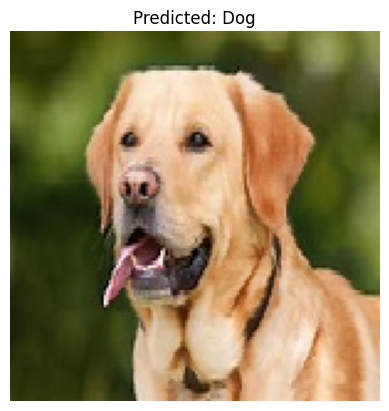

In [43]:
# Display the image with predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()